### Import any tools needed

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sso_tools import catalogs
from sso_tools import lightcurves as lcc
from sso_tools import ztf

### Change the directory

In [2]:
change_dir= "../../../../../../../epyc/projects/sso-lc/notebooks/july_16_2019/"
os.chdir(change_dir)

This is all the known trojan orbital data

In [3]:
knownrot = pd.read_csv("trojan_orbits.dat")
#knownrot

And this is all the fit data from the lc

In [4]:
fitrot = pd.read_csv("trojan_fit_data")
#fitrot

We can now merge the two tables and call it obj_data

In [19]:
obj_data = fitrot.merge(knownrot, left_on="Name", right_on="ztfname")

Text(0.5, 0, 'Previously measured period (hrs)')

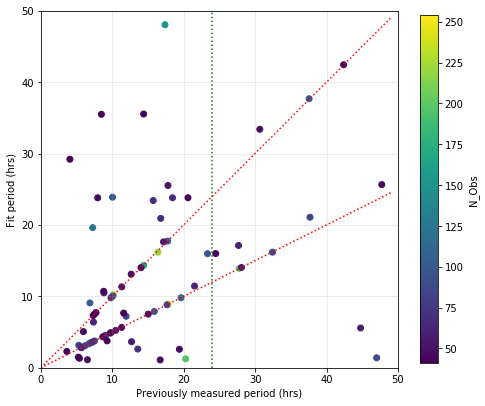

In [20]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_aspect('equal')
plt.scatter(obj_data.rot, obj_data.Period, c=obj_data.Nobs)
plt.colorbar(shrink=0.8, label='N_Obs')
x = np.arange(0, 50)
plt.plot(x, x, 'r:')
plt.plot(x, x/2, 'r:')
plt.axvline(24.0, color='g', linestyle=':')
plt.ylim(0, 50)
plt.xlim(0, 50)
plt.grid(True, alpha=0.3)
plt.ylabel('Fit period (hrs)')
plt.xlabel('Previously measured period (hrs)')

Let's find all the asteroids that don't fall on either the same period or double.

In [21]:
obj_data_disagree = obj_data[obj_data.rot>0][(obj_data.Period/obj_data.rot<0.49) | (obj_data.Period/obj_data.rot>0.51) & (obj_data.Period/obj_data.rot<0.98) |(obj_data.Period/obj_data.rot>1.02)]

/epyc/projects/sso-lc/conda-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


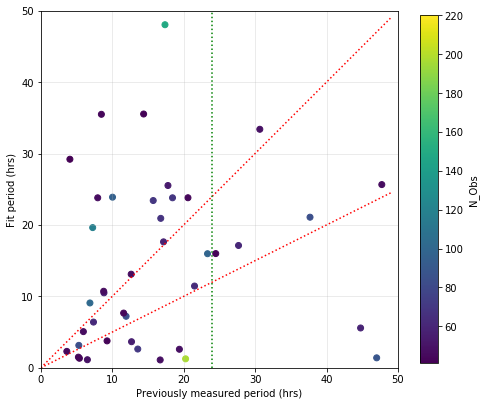

In [277]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_aspect('equal')
plt.scatter(obj_data_disagree.rot, obj_data_disagree.Period, c=obj_data_disagree.Nobs)
plt.colorbar(shrink=0.8, label='N_Obs')
x = np.arange(0, 50)
plt.plot(x, x, 'r:')
plt.plot(x, x/2, 'r:')
plt.axvline(24.0, color='g', linestyle=':')
plt.ylim(0, 50)
plt.xlim(0, 50)
plt.grid(True, alpha=0.3)
plt.ylabel('Fit period (hrs)')
plt.xlabel('Previously measured period (hrs)')
plt.show()

There. Now all the ones that are correct have been masked.

In [281]:
obj_data_disagree

,Name,Nobs,N_rejected,Nobs_g,Nobs_r,Nobs_i,Nights,g-r,r-i,Period,...,argPeri,tPeri,meanAnomaly,epoch,H,g,diam,albedo,rot,ztfname
4,23958,220,5,39,179,2,64,0.560055,0.434582,23.031109,...,235.00,60305.997,219.0,58600.0,10.20,0.15,46.001,0.076,562.00000,23958
11,3801,197,2,59,138,0,84,0.542136,-999.000000,1.256022,...,204.00,59802.978,263.0,58600.0,11.10,0.15,34.285,0.066,20.27000,3801
19,11395,149,2,61,88,0,83,0.494283,-999.000000,48.034531,...,118.00,58728.624,349.0,58600.0,9.90,0.15,68.977,0.045,17.38300,11395
22,228102,118,0,1,117,0,5,0.607104,-999.000000,19.628748,...,237.00,60138.930,230.0,58600.0,12.40,0.15,NaN,NaN,7.25900,228102
26,257405,102,1,1,101,0,8,0.543248,-999.000000,9.079218,...,237.00,60343.505,214.0,58600.0,12.30,0.15,NaN,NaN,6.87600,257405
29,32496,99,0,31,55,13,55,0.606583,0.205519,15.973498,...,275.00,60175.627,232.0,58600.0,10.20,0.15,48.017,0.070,23.34000,32496
33,3709,96,0,49,45,2,60,0.538643,0.360473,23.888309,...,246.00,60100.999,237.0,58600.0,9.10,0.15,65.297,0.087,10.03900,3709
37,17172,89,0,33,41,15,50,0.604452,0.269890,1.395817,...,216.00,60290.888,220.0,58600.0,10.80,0.15,34.482,0.078,47.02000,17172
40,4832,85,1,23,53,9,51,0.619943,0.221049,3.142101,...,210.00,60343.962,218.0,58600.0,10.00,0.15,52.058,0.071,5.31900,4832
41,54656,85,1,30,45,10,51,0.598204,0.254836,7.212045,...,179.00,59636.637,276.0,58600.0,10.70,0.15,37.743,0.078,11.93700,54656


In [307]:
obj_data_disagree.query('rot < 100')[['Name', 'rot', 'Nobs','Nobs_g','Nobs_r','Nobs_i', 'Period']][0:30]

,Name,rot,Nobs,Nobs_g,Nobs_r,Nobs_i,Period
11,3801,20.27000,197,59,138,0,1.256022
19,11395,17.38300,149,61,88,0,48.034531
22,228102,7.25900,118,1,117,0,19.628748
26,257405,6.87600,102,1,101,0,9.079218
29,32496,23.34000,99,31,55,13,15.973498
33,3709,10.03900,96,49,45,2,23.888309
37,17172,47.02000,89,33,41,15,1.395817
40,4832,5.31900,85,23,53,9,3.142101
41,54656,11.93700,85,30,45,10,7.212045
42,76857,37.69000,85,21,51,13,21.084546


In [303]:
names = obj_data_disagree.Name

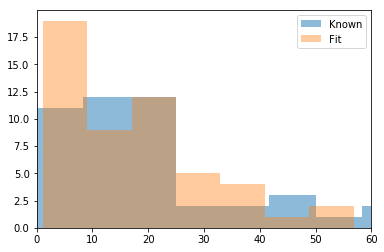

In [293]:
n, b, p  = plt.hist(obj_data_disagree.rot, bins='auto', range=[0, 100], alpha=0.5, label="Known")
n, b, p  = plt.hist(obj_data_disagree.Period, bins='auto', alpha=0.4, label="Fit")
plt.xlim(0, 60)
plt.legend()

# Find the outlier asteroid data in the ztf files

This is a csv of all the detections on all the asteroids. It's very big and might take a few minutes to load.

In [290]:
all_detections = pd.read_csv("ztf_alert_sso.csv")

/epyc/projects/sso-lc/conda-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (81,101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
# Identify the moving objects which are likely to be good targets for lightcurve determination.
objnames = ztf.identify_candidates(all_detections, min_obs=10, dist_cutoff=10)

In [68]:
len(objnames)

108975

In [304]:
names = names.reset_index(drop=True)

In [305]:
names

0      23958
1       3801
2      11395
3     228102
4     257405
5      32496
6       3709
7      17172
8       4832
9      54656
10     76857
11       617
12     82055
13      4722
14     51958
15     30705
16      9799
17     34642
18      4754
19      7352
20     30942
21     24451
22     16956
23     11397
24     18046
25      7543
26     90337
27      1871
28      9023
29      5511
30     54672
31     51365
32     42367
33      5638
34     11351
35      2207
36     21601
37      5144
38     25911
39     69437
40     54652
41      2759
42      2674
43      1873
44    353363
45      1173
46     16974
47     37519
48      1437
49     12929
50      2357
51     23480
Name: Name, dtype: object

This sets up an asteroid object based on the ZTF name given.

In [309]:
ast = ztf.AsteroidObj(magcol='magpsf')
ast(alertdata, names[2], minJD=None, maxJD=None)

Filter 1 (g) has 63 observations
Filter 2 (r) has 88 observations


Filter 2 (r) tends to have the most consistent observations so let's use those

In [312]:
time = ast.obs.jd[ast.obs.fid==2]

In [245]:
t0 = time[0:1].values

In [313]:
flux = ast.obs.magpsf[ast.obs.fid==2]

In [314]:
flux_err = ast.obs.sigmapsf.values[ast.obs.fid==2]

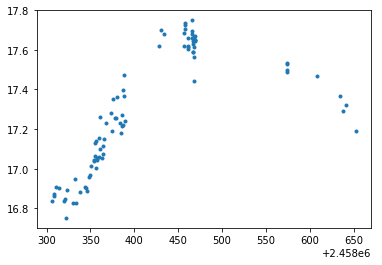

In [318]:
plt.plot(time, flux, '.')

In [332]:
df = pd.DataFrame(np.array([time, flux,flux_err]).T)

Now we can save the dataframe with all our info to a txt file.

In [336]:
df.to_csv(r"../../../../users/cwlind/CometGPs/data/paper_plots/ztf_lightcurves/%s.txt"%names[2], header=None, index=None, sep=' ')

I'm going to set up a loop to run through all the names and produce a textfile result for all of them.

In [337]:
for i in np.arange(len(names)):
    ast = ztf.AsteroidObj(magcol='magpsf')
    ast(alertdata, names[i], minJD=None, maxJD=None)
    
    time = ast.obs.jd[ast.obs.fid==2]
    flux = ast.obs.magpsf[ast.obs.fid==2]
    flux_err = ast.obs.sigmapsf.values[ast.obs.fid==2]
    
    df = pd.DataFrame(np.array([time, flux,flux_err]).T)
    
    df.to_csv(r"../../../../users/cwlind/CometGPs/data/paper_plots/ztf_lightcurves/%s.txt"%names[i], header=None, index=None, sep=' ')

Filter 1 (g) has 43 observations
Filter 2 (r) has 180 observations
Filter 3 (i) has 2 observations
Filter 1 (g) has 61 observations
Filter 2 (r) has 138 observations
Filter 1 (g) has 63 observations
Filter 2 (r) has 88 observations
Filter 2 (r) has 117 observations
Filter 1 (g) has 1 observations
Filter 2 (r) has 102 observations
Filter 1 (g) has 1 observations
Filter 1 (g) has 31 observations
Filter 2 (r) has 55 observations
Filter 3 (i) has 13 observations
Filter 1 (g) has 49 observations
Filter 2 (r) has 45 observations
Filter 3 (i) has 2 observations
Filter 1 (g) has 33 observations
Filter 2 (r) has 41 observations
Filter 3 (i) has 15 observations
Filter 2 (r) has 53 observations
Filter 1 (g) has 24 observations
Filter 3 (i) has 9 observations
Filter 1 (g) has 30 observations
Filter 2 (r) has 46 observations
Filter 3 (i) has 10 observations
Filter 2 (r) has 51 observations
Filter 1 (g) has 21 observations
Filter 3 (i) has 13 observations
Filter 1 (g) has 27 observations
Filter 2 (r

# Import all gp results

In [17]:
gp_periods = pd.read_csv("../../../../users/cwlind/CometGPs/notebooks/gp_periods", delimiter=',',
                     header=0, names=['ztf','N_obs','gp_period'], index_col=0)

In [18]:
gp_periods

,ztf,N_obs,gp_period
0,11397,27.0,11.999510
1,11395,88.0,24.060580
2,1173,25.0,23.819678
3,17172,41.0,11.996145
4,1873,23.0,3.827600
5,11351,35.0,12.004748
6,16956,31.0,2.229908
7,1871,28.0,2.424284
8,16974,16.0,7.998908
9,18046,27.0,2.872792


In [27]:
d1 = pd.DataFrame({'col1': [1, 2 , 4],  'col2': [3, 4 , 5]})

d2 = pd.DataFrame({'col1': [1, 10], 'col3': [3, 4]})

joined = gp_periods.set_index('ztf').join(obj_data_disagree.set_index('ztfname'))

In [32]:
gp_periods.ztf

0     11397
1     11395
2      1173
3     17172
4      1873
5     11351
6     16956
7      1871
8     16974
9     18046
10    12929
11     1437
Name: ztf, dtype: int64

In [37]:
obj_data_disagree.ztfname = pd.to_numeric(obj_data_disagree.ztfname)

In [38]:
obj_data_disagree.ztfname

4       23958
11       3801
19      11395
22     228102
26     257405
29      32496
33       3709
37      17172
40       4832
41      54656
42      76857
54        617
67      82055
69       4722
70      51958
71      30705
80       9799
81      34642
82       4754
85       7352
87      30942
89      24451
91      16956
94      11397
97      18046
102      7543
109     90337
116      1871
119      9023
122      5511
123     54672
124     51365
126     42367
127      5638
130     11351
132      2207
133     21601
135      5144
136     25911
147     69437
149     54652
151      2759
153      2674
155      1873
156    353363
157      1173
160     16974
163     37519
164      1437
165     12929
167      2357
174     23480
Name: ztfname, dtype: int64

In [41]:
joined=  pd.merge(gp_periods, obj_data_disagree, left_on='ztf', right_on='ztfname', how='left')

In [45]:
joined[["ztf", 'gp_period', 'rot', 'Period']]

,ztf,gp_period,rot,Period
0,11397,11.999510,12.7000,3.652518
1,11395,24.060580,17.3830,48.034531
2,1173,23.819678,11.5950,7.662354
3,17172,11.996145,47.0200,1.395817
4,1873,3.827600,20.6000,23.810606
5,11351,12.004748,445.7320,21.624811
6,16956,2.229908,8.8400,10.492168
7,1871,2.424284,6.5200,1.131771
8,16974,7.998908,78.9000,1.602147
9,18046,2.872792,36.0000,56.819338


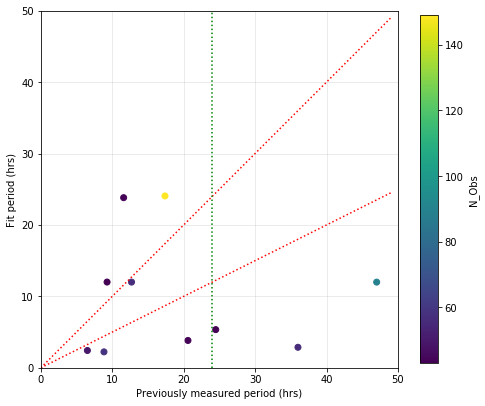

In [43]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_aspect('equal')
plt.scatter(joined.rot, joined.gp_period, c=joined.Nobs)
plt.colorbar(shrink=0.8, label='N_Obs')
x = np.arange(0, 50)
plt.plot(x, x, 'r:')
plt.plot(x, x/2, 'r:')
plt.axvline(24.0, color='g', linestyle=':')
plt.ylim(0, 50)
plt.xlim(0, 50)
plt.grid(True, alpha=0.3)
plt.ylabel('Fit period (hrs)')
plt.xlabel('Previously measured period (hrs)')
plt.show()